<a href="https://colab.research.google.com/github/Edward-Eughene-Timothy/DQN-RL-for-Hikikomori-Reintegration/blob/testing/Reinforcement_learning_with_Deep_Q_Networks_for_Hikikomori_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gym
!pip install keras-rl2
!pip install tensorflow==2.12.0
!pip install keras==2.12.0
import warnings
warnings.filterwarnings('ignore')

In [2]:
import gym
import numpy as np
from gym import spaces
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers.legacy import Adam
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

class HikikomoriEnv(gym.Env):
    def __init__(self):
        super(HikikomoriEnv, self).__init__()

        # Define state space (Social Engagement Level: 0 - 10)
        self.state = 0  # Start at lowest social engagement
        self.max_state = 10

        # Define action space (Task difficulty: 0 = Easy, 1 = Medium, 2 = Hard)
        self.action_space = spaces.Discrete(3)

        # Observation space (Current engagement level)
        self.observation_space = spaces.Box(low=0, high=self.max_state, shape=(1,), dtype=np.int32)

    def step(self, action):
        """
        Actions: 0 (Easy Task), 1 (Medium Task), 2 (Hard Task)
        Rewards are based on task completion (simulated randomly)
        """
        reward = 0
        done = False

        # Simulate user response (higher chance to complete easier tasks)
        success_prob = {0: 0.9, 1: 0.6, 2: 0.3}  # Probability of success per difficulty level
        completed = np.random.rand() < success_prob[action]

        if completed:
            self.state = min(self.state + 1, self.max_state)  # Increase engagement level
            reward = action + 1  # Reward based on task difficulty
        else:
            reward = -1  # Negative reward for failure

        # Check if max engagement level is reached
        if self.state == self.max_state:
            done = True

        return np.array([self.state]), reward, done, {}
    def reset(self):
        """ Reset environment to initial state """
        self.state = 0
        return np.array([self.state])  # Return the initial state observation

    def render(self, mode='human'):  # Add mode argument
        print(f"Current Social Engagement Level: {self.state}")



/usr/local/lib/python3.11/dist-packages/tensorflow/python/debug/cli/debugger_cli_common.py:19: DeprecationWarning: module 'sre_constants' is deprecated
  import sre_constants
/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/util.py:52: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs.
  from jax import xla_computation as _xla_computation


In [3]:
def build_model(state_shape, action_size):
    model = Sequential()
    model.add(Flatten(input_shape=(1,) + state_shape))
    model.add(Dense(64, activation='relu'))  # Increased neurons
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))  # Added another layer
    model.add(Dense(action_size, activation='linear'))
    return model


In [4]:
# Build DQN Agent
def build_agent(model, action_size):
    memory = SequentialMemory(limit=50000, window_length=1)
    policy = BoltzmannQPolicy()
    dqn = DQNAgent(model=model,
                   memory=memory,
                   policy=policy,
                   nb_actions=action_size,
                   nb_steps_warmup=10,
                   target_model_update=1e-2)
    return dqn

In [5]:
if __name__ == "__main__":
    env = HikikomoriEnv()
    state_shape = env.observation_space.shape
    action_size = env.action_space.n
    warnings.filterwarnings('ignore')
    model = build_model(state_shape, action_size)
    dqn = build_agent(model, action_size)
    dqn.compile(Adam(learning_rate=1e-3), metrics=['mae'])
    print("Training DQN agent...")
    dqn.fit(env, nb_steps=100000, visualize=False, verbose=1)



Training DQN agent...
Training for 100000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 89s 9ms/step - reward: 0.6351
601 episodes - episode_reward: 10.564 [-3.000, 21.000] - loss: 0.455 - mae: 4.333 - mean_q: 6.332

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 88s 9ms/step - reward: 0.6367
594 episodes - episode_reward: 10.707 [-5.000, 22.000] - loss: 0.416 - mae: 4.727 - mean_q: 6.940

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 93s 9ms/step - reward: 0.6334
596 episodes - episode_reward: 10.643 [-10.000, 22.000] - loss: 0.416 - mae: 4.775 - mean_q: 7.009

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 93s 9ms/step - reward: 0.6048
585 episodes - episode_reward: 10.318 [-2.000, 21.000] - loss: 0.419 - mae: 4.786 - mean_q: 7.024

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 98s 10ms/step - reward: 0

In [12]:
print("Testing trained agent...")
scores=dqn.test(env, nb_episodes=50, visualize=True)
print(np.mean(scores.history['episode_reward']))

Testing trained agent...
Testing for 50 episodes ...
Current Social Engagement Level: 1
Current Social Engagement Level: 2
Current Social Engagement Level: 3
Current Social Engagement Level: 4
Current Social Engagement Level: 4
Current Social Engagement Level: 4
Current Social Engagement Level: 5
Current Social Engagement Level: 6
Current Social Engagement Level: 7
Current Social Engagement Level: 8
Current Social Engagement Level: 9
Current Social Engagement Level: 10
Episode 1: reward: 18.000, steps: 12
Current Social Engagement Level: 1
Current Social Engagement Level: 2
Current Social Engagement Level: 3
Current Social Engagement Level: 3
Current Social Engagement Level: 3
Current Social Engagement Level: 4
Current Social Engagement Level: 4
Current Social Engagement Level: 4
Current Social Engagement Level: 5
Current Social Engagement Level: 6
Current Social Engagement Level: 7
Current Social Engagement Level: 8
Current Social Engagement Level: 8
Current Social Engagement Level: 9

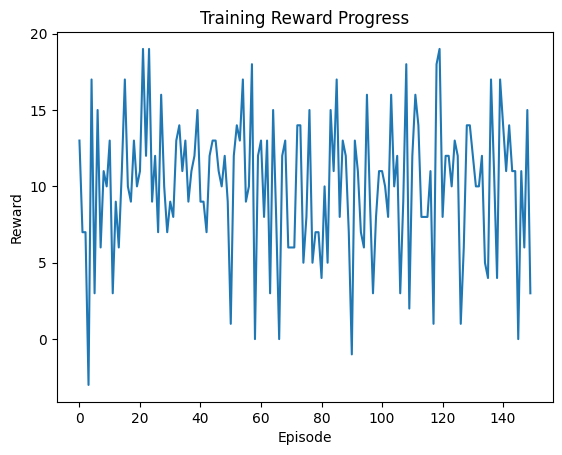

In [6]:
import matplotlib.pyplot as plt

# Get the training history from DQN

# Extract rewards per episode
rewards = scores.history['episode_reward']

# Plot rewards
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Training Reward Progress")
plt.show()


Training for 100000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 99s 10ms/step - reward: 0.6288
596 episodes - episode_reward: 10.537 [-4.000, 22.000] - loss: 0.427 - mae: 4.687 - mean_q: 6.864

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 98s 10ms/step - reward: 0.6489
601 episodes - episode_reward: 10.784 [-4.000, 22.000] - loss: 0.427 - mae: 4.683 - mean_q: 6.856

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 100s 10ms/step - reward: 0.6133
589 episodes - episode_reward: 10.433 [-6.000, 22.000] - loss: 0.418 - mae: 4.751 - mean_q: 6.971

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 99s 10ms/step - reward: 0.6175
587 episodes - episode_reward: 10.516 [-3.000, 21.000] - loss: 0.420 - mae: 4.754 - mean_q: 6.971

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 98s 10ms/step - reward: 0.6102
590 episodes

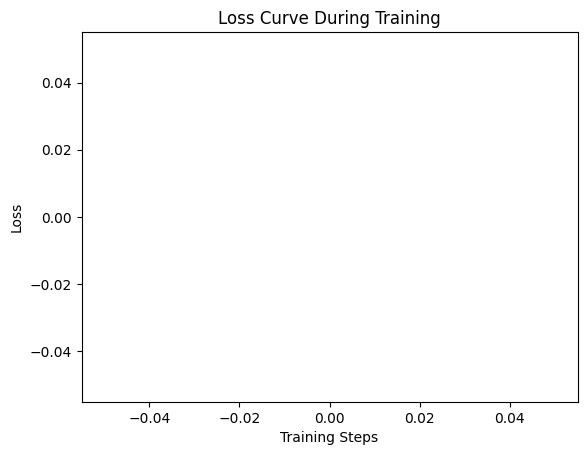

In [11]:

from tensorflow.keras.callbacks import Callback

class LossHistoryCallback(Callback):
    def __init__(self):
        self.losses = []

    def on_batch_end(self, batch, logs=None):
        if logs and 'loss' in logs:
            self.losses.append(logs['loss'])  # Save loss per batch


loss_callback = LossHistoryCallback()

score = dqn.fit(env, nb_steps=100000, visualize=False, verbose=1, callbacks=[loss_callback])


import matplotlib.pyplot as plt
losses = history.history['loss']
# plt.plot(losses)
plt.plot(losses)
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Loss Curve During Training")
plt.show()
